In [2]:
#1
import numpy as np

# Step 1: Initialize the Perceptron class
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.1):
        self.weights = np.random.randn(input_dim)  # Random initialization of weights
        self.bias = np.random.randn(1)  # Random initialization of bias
        self.learning_rate = learning_rate
    
    # Step 2: Activation function (Step Function)
    def activation(self, x):
        return 1 if x >= 0 else 0

    # Step 3: Training method
    def train(self, X, y, epochs=100):
        for epoch in range(epochs):
            for i in range(len(X)):
                # Weighted sum
                linear_output = np.dot(X[i], self.weights) + self.bias
                # Apply the activation function
                prediction = self.activation(linear_output)
                # Update weights and bias if the prediction is incorrect
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

    # Step 4: Prediction method
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

# Step 5: Example usage

# Training data (AND logic gate example)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # Labels

# Initialize perceptron with 2 inputs (AND gate has 2 inputs)
perceptron = Perceptron(input_dim=2)

# Train the perceptron
perceptron.train(X, y, epochs=100)

# Test predictions
for x in X:
    print(f"Input: {x}, Prediction: {perceptron.predict(x)}")


Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1


In [3]:
#2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
data = load_iris()
X = data.data  # features
y = data.target  # labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode the labels (One-hot encoding for multi-class)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


In [4]:
#3.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import GlorotUniform
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load Iris dataset
data = load_iris()
X = data.data  # features
y = data.target  # labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode the labels (One-hot encoding for multi-class)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Initialize the model
model = Sequential()

# Input layer + Hidden layer with Xavier (Glorot) initialization
model.add(Dense(10, input_dim=4, activation='relu', kernel_initializer=GlorotUniform()))

# Output layer (softmax activation for multi-class classification)
model.add(Dense(3, activation='softmax', kernel_initializer=GlorotUniform()))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predict class labels for the test data
predictions = model.predict(X_test)
predicted_labels = predictions.argmax(axis=1)
print("Predicted labels:", predicted_labels)


Epoch 1/100


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.2123 - loss: 1.2511 - val_accuracy: 0.1667 - val_loss: 1.2761
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2223 - loss: 1.2001 - val_accuracy: 0.1667 - val_loss: 1.2361
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2285 - loss: 1.1521 - val_accuracy: 0.1667 - val_loss: 1.1972
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2196 - loss: 1.1391 - val_accuracy: 0.1667 - val_loss: 1.1590
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2523 - loss: 1.0819 - val_accuracy: 0.2000 - val_loss: 1.1224
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2800 - loss: 1.0725 - val_accuracy: 0.2000 - val_loss: 1.0868
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2879 - loss: 1.0288 - val_accuracy: 0.2333 - val_loss: 1.0526
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3444 - loss: 0.9985 - val_accuracy: 0.3000 - val_loss: 1.0205
Epo

In [5]:
#4
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.activations import relu, sigmoid, tanh, softmax, elu, swish
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
data = load_iris()
X = data.data  # features
y = data.target  # labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Initialize the model
model = Sequential()

# First hidden layer with ReLU activation
model.add(Dense(10, input_dim=4, activation='relu'))

# Second hidden layer with Leaky ReLU activation
model.add(Dense(10, activation=LeakyReLU(alpha=0.1)))

# Third hidden layer with Tanh activation
model.add(Dense(10, activation='tanh'))

# Output layer with Softmax activation (for multi-class classification)
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predict class labels for the test data
predictions = model.predict(X_test)
predicted_labels = predictions.argmax(axis=1)
print("Predicted labels:", predicted_labels)


Epoch 1/100


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.7719 - loss: 0.9759 - val_accuracy: 0.8667 - val_loss: 0.9489
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8433 - loss: 0.9429 - val_accuracy: 0.8667 - val_loss: 0.9261
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8204 - loss: 0.9260 - val_accuracy: 0.8667 - val_loss: 0.9034
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8373 - loss: 0.9018 - val_accuracy: 0.9000 - val_loss: 0.8798
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8133 - loss: 0.8870 - val_accuracy: 0.9000 - val_loss: 0.8562
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8321 - loss: 0.8568 - val_accuracy: 0.9000 - val_loss: 0.8319
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8165 - loss: 0.8364 - val_accuracy: 0.9000 - val_loss: 0.8076
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7998 - loss: 0.8209 - val_accuracy: 0.9000 - val_loss: 0.7831
Epo

In [6]:
#5
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load Iris dataset
data = load_iris()
X = data.data  # features
y = data.target  # labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode the labels (One-hot encoding for multi-class)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Initialize the model
model = Sequential()

# First hidden layer with ReLU activation
model.add(Dense(10, input_dim=4, activation='relu'))

# Apply Dropout (20% of neurons will be dropped)
model.add(Dropout(0.2))

# Second hidden layer with ReLU activation
model.add(Dense(10, activation='relu'))

# Apply Dropout (20% of neurons will be dropped)
model.add(Dropout(0.2))

# Output layer with Softmax activation for multi-class classification
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predict class labels for the test data
predictions = model.predict(X_test)
predicted_labels = predictions.argmax(axis=1)
print("Predicted labels:", predicted_labels)


Epoch 1/100


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.2902 - loss: 1.1705 - val_accuracy: 0.4333 - val_loss: 1.1263
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3475 - loss: 1.1443 - val_accuracy: 0.4333 - val_loss: 1.1060
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3215 - loss: 1.1090 - val_accuracy: 0.5000 - val_loss: 1.0870
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3408 - loss: 1.1143 - val_accuracy: 0.5000 - val_loss: 1.0693
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3652 - loss: 1.1184 - val_accuracy: 0.5333 - val_loss: 1.0522
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4594 - loss: 1.0795 - val_accuracy: 0.6000 - val_loss: 1.0352
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4294 - loss: 1.0496 - val_accuracy: 0.6333 - val_loss: 1.0189
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5225 - loss: 1.0190 - val_accuracy: 0.6333 - val_loss: 1.0024
Epo

In [7]:
#6.
import numpy as np

# Step 1: Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Step 2: Define the forward propagation function
def forward_propagation(X, W1, b1, W2, b2):
    # Layer 1: Input to Hidden Layer
    z1 = np.dot(X, W1) + b1   # Linear transformation
    a1 = relu(z1)             # Apply ReLU activation function

    # Layer 2: Hidden Layer to Output Layer
    z2 = np.dot(a1, W2) + b2   # Linear transformation
    a2 = sigmoid(z2)           # Apply Sigmoid activation function (for binary classification)

    return a1, a2  # Return hidden layer activations and final output

# Step 3: Initialize the network parameters (weights and biases)
input_size = 3   # Number of input features
hidden_size = 4  # Number of neurons in hidden layer
output_size = 1  # Output size (for binary classification)

# Randomly initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)  # Weights from input to hidden layer
b1 = np.zeros((1, hidden_size))                 # Bias for hidden layer
W2 = np.random.randn(hidden_size, output_size)  # Weights from hidden to output layer
b2 = np.zeros((1, output_size))                 # Bias for output layer

# Step 4: Example input data (let's assume 4 examples with 3 features each)
X = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6],
              [0.7, 0.8, 0.9],
              [0.9, 0.8, 0.7]])

# Step 5: Perform forward propagation
a1, a2 = forward_propagation(X, W1, b1, W2, b2)

# Output activations for the hidden layer and the final output layer
print("Hidden layer activations (a1):")
print(a1)
print("\nFinal output layer activations (a2):")
print(a2)


Hidden layer activations (a1):
[[0.         0.10211419 0.24158611 0.16607101]
 [0.         0.15316183 0.77063121 0.71349145]
 [0.         0.20420946 1.29967631 1.2609119 ]
 [0.         0.06804459 1.52189755 1.65866383]]

Final output layer activations (a2):
[[0.33060082]
 [0.11675712]
 [0.0341733 ]
 [0.02441159]]


In [8]:
#7.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load Iris dataset
data = load_iris()
X = data.data  # features
y = data.target  # labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode the labels (One-hot encoding for multi-class)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Initialize the model
model = Sequential()

# First hidden layer with Batch Normalization
model.add(Dense(10, input_dim=4))  # Dense layer with 10 neurons
model.add(BatchNormalization())    # Apply Batch Normalization
model.add(tf.keras.layers.ReLU())  # Apply ReLU activation

# Second hidden layer with Batch Normalization
model.add(Dense(10))               # Dense layer with 10 neurons
model.add(BatchNormalization())    # Apply Batch Normalization
model.add(tf.keras.layers.ReLU())  # Apply ReLU activation

# Output layer with Softmax activation for multi-class classification
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predict class labels for the test data
predictions = model.predict(X_test)
predicted_labels = predictions.argmax(axis=1)
print("Predicted labels:", predicted_labels)


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.3442 - loss: 1.1703 - val_accuracy: 0.3667 - val_loss: 1.0542
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4106 - loss: 1.0952 - val_accuracy: 0.4333 - val_loss: 1.0204
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3952 - loss: 1.0540 - val_accuracy: 0.4000 - val_loss: 0.9905
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4152 - loss: 1.0006 - val_accuracy: 0.4000 - val_loss: 0.9625
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4060 - loss: 0.9792 - val_accuracy: 0.4000 - val_loss: 0.9356
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4137 - loss: 0.9642 - val_accuracy: 0.4000 - val_loss: 0.9104
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4394 - loss: 0.9024 - val_accuracy: 0.4000 - val_loss: 0.8864
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4469 - loss: 0.8704 - val_accuracy: 0.5333 - val_loss

Epoch 1/100


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.2015 - loss: 1.0728 - val_accuracy: 0.2000 - val_loss: 1.0422
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3352 - loss: 1.0427 - val_accuracy: 0.3333 - val_loss: 1.0273
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3554 - loss: 1.0315 - val_accuracy: 0.4000 - val_loss: 1.0125
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4425 - loss: 1.0187 - val_accuracy: 0.5667 - val_loss: 0.9975
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4812 - loss: 1.0171 - val_accuracy: 0.5667 - val_loss: 0.9827
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5281 - loss: 0.9978 - val_accuracy: 0.5667 - val_loss: 0.9681
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5831 - loss: 0.9796 - val_accuracy: 0.6000 - val_loss: 0.9536
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5790 - loss: 0.9821 - val_accuracy: 0.6333 - val_loss: 0.9392
Epo

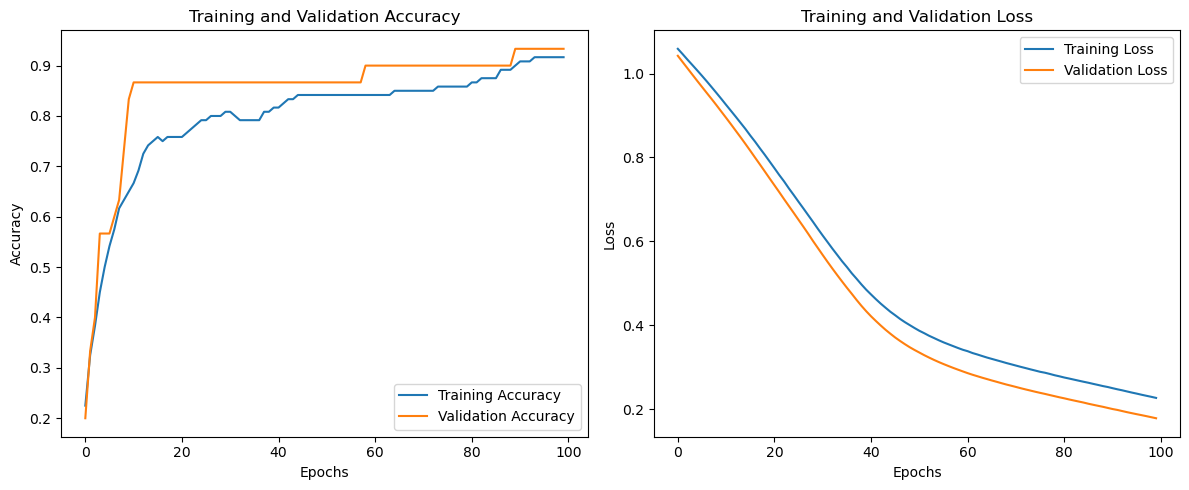

In [9]:
#8
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load Iris dataset
data = load_iris()
X = data.data  # features
y = data.target  # labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode the labels (One-hot encoding for multi-class)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Initialize the model
model = Sequential()

# Add layers
model.add(Dense(10, input_dim=4, activation='relu'))  # Hidden layer
model.add(Dense(10, activation='relu'))  # Hidden layer
model.add(Dense(3, activation='softmax'))  # Output layer (for multi-class classification)

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Step 1: Visualize the accuracy curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # First subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Step 2: Visualize the loss curve
plt.subplot(1, 2, 2)  # Second subplot for loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [10]:
#9.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load Iris dataset
data = load_iris()
X = data.data  # features
y = data.target  # labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode the labels (One-hot encoding for multi-class)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Initialize the model
model = Sequential()

# Add layers
model.add(Dense(10, input_dim=4, activation='relu'))  # Hidden layer
model.add(Dense(10, activation='relu'))  # Hidden layer
model.add(Dense(3, activation='softmax'))  # Output layer (for multi-class classification)

# Compile the model with gradient clipping (clip gradients by value or norm)
optimizer = tf.keras.optimizers.Adam(clipvalue=1.0)  # Clip gradients by value (if they exceed 1.0)

# Alternatively, you can use clipnorm to clip by gradient norm
# optimizer = tf.keras.optimizers.Adam(clipnorm=1.0)  # Clip gradients by norm (if norm exceeds 1.0)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predict class labels for the test data
predictions = model.predict(X_test)
predicted_labels = predictions.argmax(axis=1)
print("Predicted labels:", predicted_labels)


Epoch 1/100


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.3487 - loss: 1.3099 - val_accuracy: 0.2667 - val_loss: 1.3568
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3281 - loss: 1.2728 - val_accuracy: 0.2667 - val_loss: 1.3285
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3635 - loss: 1.2222 - val_accuracy: 0.2667 - val_loss: 1.3018
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3323 - loss: 1.2373 - val_accuracy: 0.2667 - val_loss: 1.2756
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2979 - loss: 1.2299 - val_accuracy: 0.2667 - val_loss: 1.2502
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3552 - loss: 1.1860 - val_accuracy: 0.2667 - val_loss: 1.2272
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3700 - loss: 1.1791 - val_accuracy: 0.2667 - val_loss: 1.2052
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3033 - loss: 1.1620 - val_accuracy: 0.2667 - val_loss: 1.1854
Epo

In [11]:
#10.
import tensorflow as tf

def custom_loss(y_true, y_pred):
    # Calculate Mean Squared Error (MSE)
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    
    # Add a custom factor to the loss
    custom_factor = 0.5
    return mse + custom_factor


In [12]:
#11
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple model
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Print the model summary
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)